<h1>Visualizations</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

with open("BikeRentalDaily_train.csv", "r",encoding="utf-8") as f:
    df = pd.read_csv(f, delimiter=";")

In [34]:
df[['instant', 'dteday']]

,instant,dteday
0,154,03.06.2011
1,685,15.11.2012
2,368,03.01.2012
3,472,16.04.2012
4,442,17.03.2012
...,...,...
595,78,19.03.2011
596,81,22.03.2011
597,377,12.01.2012
598,299,26.10.2011


For a better overview and prober working, we could sort instant ascending to get a chronical order of dtdays

C:\Users\ruhmt\AppData\Local\Temp\ipykernel_11636\1823745849.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['temp'], kde=True)


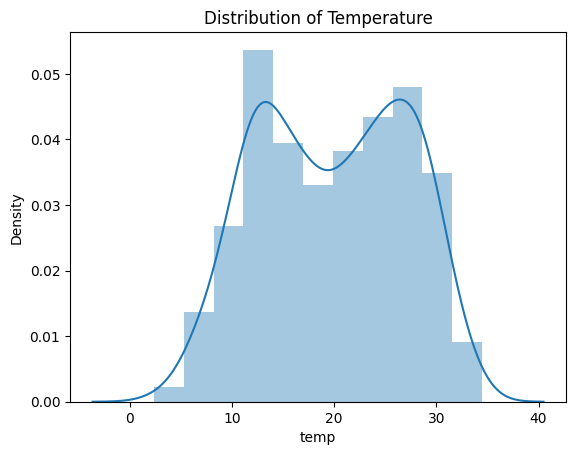

In [2]:
# Visualize the distribution of temperature
sns.distplot(df['temp'], kde=True)
plt.title('Distribution of Temperature')
plt.show()

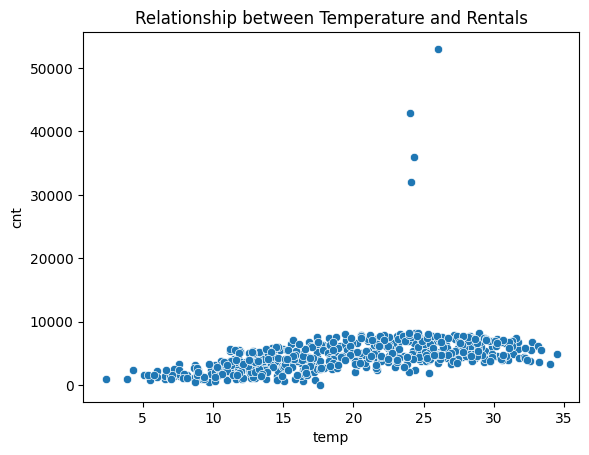

In [3]:
# Visualize the relationship between temperature and rentals (cnt)
sns.scatterplot(x='temp', y='cnt', data=df)
plt.title('Relationship between Temperature and Rentals')
plt.show()

We notice 4 outliers in the 30-55k range

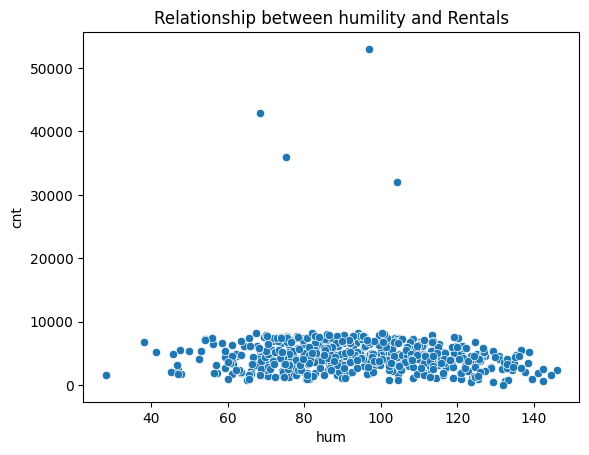

In [14]:
sns.scatterplot(x='hum', y='cnt', data=df)
plt.title('Relationship between humility and Rentals')
plt.show()

There are also 4 outliers in the 30-55k range

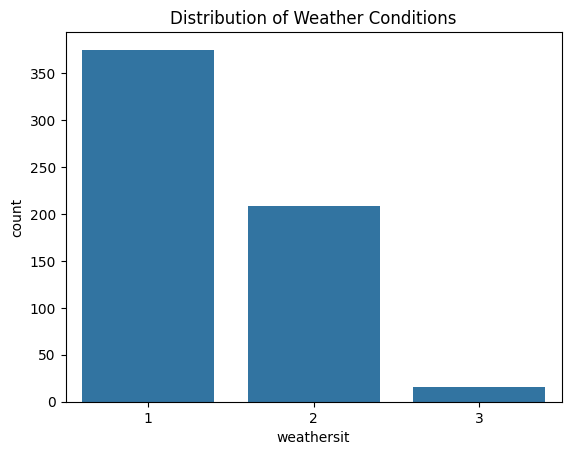

In [4]:
# Visualize the distribution of weather conditions
sns.countplot(x='weathersit', data=df)
plt.title('Distribution of Weather Conditions')
plt.show()

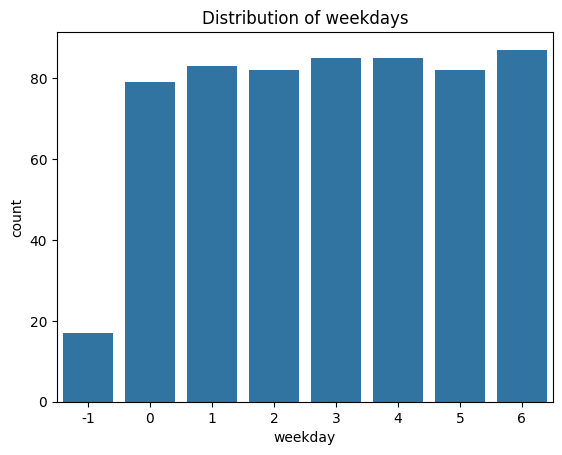

In [23]:
sns.countplot(x='weekday', data=df)
plt.title('Distribution of weekdays')
plt.show()


In [27]:
df[df['weekday']==-1]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
4,442,17.03.2012,1.0,1,3,0,-1,0,2,20.5667,0.505046,113.37495,0.110704,773,1,3155,4681,7836
74,312,08.11.2011,4.0,0,11,0,-1,1,1,16.3333,0.412246,108.25005,0.069038,686,0,376,3829,4205
79,316,12.11.2011,4.0,0,11,0,-1,0,1,14.2667,0.357942,82.93755,0.212062,598,0,1275,2792,4067
92,313,09.11.2011,4.0,0,11,0,-1,1,1,16.0000,0.409079,113.74995,0.062196,864,0,305,3804,4109
105,314,10.11.2011,4.0,0,11,0,-1,1,2,15.2000,0.373721,121.99995,0.189067,684,1,190,2743,2933
114,315,11.11.2011,4.0,0,11,1,-1,0,1,12.9667,0.306817,66.93750,0.314675,617,0,440,2928,3368
204,317,13.11.2011,4.0,0,11,0,-1,0,1,17.6333,0.430550,68.74995,0.281721,829,0,1004,2713,3717
225,251,08.09.2011,3.0,0,9,0,-1,1,3,25.3565,0.555361,140.93475,0.192748,684,1,153,1689,1842
254,478,22.04.2012,2.0,1,4,0,-1,0,3,15.8667,0.389504,125.31255,0.344546,603,0,120,907,1027
272,170,19.06.2011,2.0,0,6,0,-1,0,2,27.9667,0.645846,100.00005,0.102000,1019,0,1639,3105,4744


In [30]:
df[df['weekday']==0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
13,590,12.08.2012,3.0,1,8,0,0,0,1,28.0333,0.644579,79.56255,0.122512,513,0,2182,4362,6544
17,30,30.01.2011,1.0,0,1,0,0,0,1,8.6609,0.250322,108.32610,0.073983,548,0,140,956,1096
20,135,15.05.2011,2.0,0,5,0,0,0,2,22.5000,0.536000,130.06245,0.152979,1024,0,1582,2971,4553
26,9,09.01.2011,1.0,0,1,0,0,0,1,5.5333,0.116175,65.12505,0.361950,836,0,54,768,822
38,548,01.07.2012,3.0,1,7,0,0,0,1,32.6333,0.750629,NaN,0.168529,860,1,1421,4110,5531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,380,15.01.2012,1.0,1,1,0,0,0,1,6.6667,0.161625,62.87505,0.251258,871,1,284,2027,2311
557,128,08.05.2011,2.0,0,5,0,0,0,1,21.1333,0.518933,94.75005,0.074637,991,0,1401,2932,4333
565,660,21.10.2012,4.0,1,10,0,0,0,1,18.5667,0.456429,76.50000,0.166054,521,0,2132,4692,6824
566,513,27.05.2012,2.0,1,5,0,0,0,1,27.6000,0.641425,104.56245,0.215171,1005,0,3283,3308,6591


It seems, as if there are given 8 weekdays, although there should be just 7. \
Aside from that, there are the numbers 0 and -1. 0 always represents the Sunday, but \
-1 is given at random dates, so it seems that in these instants, the weekday is not given and is euqal to NaN.

For the case that we are analysing the weekdays, it is important to fix these values, eclude or delete them.

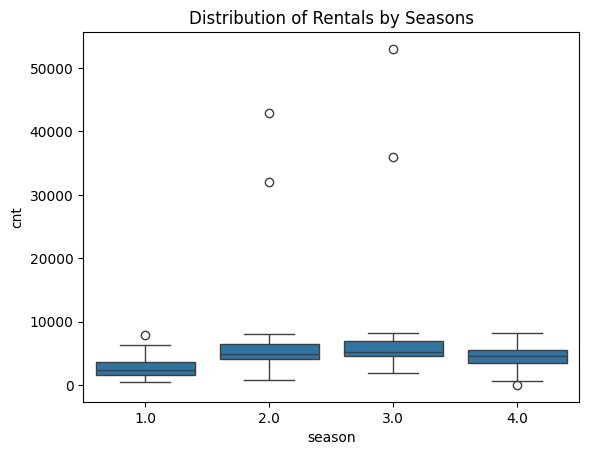

In [5]:
# Visualize the distribution of rentals in different seasons
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Distribution of Rentals by Seasons')
plt.show()

notice our 4 outliers again, these outliers could be removed to show a more detailed boxplot ?

<h1>Features to be transformed or removed</h1>

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
count,600.000000,538.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,566.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,363.116667,2.436803,0.496667,6.475000,0.03000,2.928333,0.680000,1.401667,19.808284,0.473620,93.845200,0.183696,740.065000,0.150000,1070.895000,3634.116667,4705.011667
std,208.711917,1.107240,0.500406,3.442741,0.17073,2.079360,0.466865,0.542360,7.206843,0.160439,21.380635,0.125257,164.430095,0.357369,2971.316154,1538.698254,3588.750428
min,1.000000,1.000000,0.000000,1.000000,0.00000,-1.000000,0.000000,1.000000,2.365200,0.079070,28.187550,-1.000000,459.000000,0.000000,2.000000,20.000000,22.000000
25%,181.250000,1.000000,0.000000,4.000000,0.00000,1.000000,0.000000,1.000000,13.575000,0.338256,77.328150,0.134335,600.750000,0.000000,313.000000,2499.000000,3135.000000
50%,362.500000,2.000000,0.000000,6.000000,0.00000,3.000000,1.000000,1.000000,20.100000,0.489690,93.256800,0.180971,737.000000,0.000000,722.000000,3657.000000,4530.000000
75%,538.250000,3.000000,1.000000,9.000000,0.00000,5.000000,1.000000,2.000000,26.058300,0.605127,109.921913,0.233947,875.500000,0.000000,1078.000000,4680.250000,5909.500000
max,731.000000,4.000000,1.000000,12.000000,1.00000,6.000000,1.000000,3.000000,34.466700,0.826371,145.875000,0.507463,1032.000000,1.000000,47138.000000,6946.000000,53021.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          600 non-null    int64  
 1   dteday           600 non-null    object 
 2   season           538 non-null    float64
 3   yr               600 non-null    int64  
 4   mnth             600 non-null    int64  
 5   holiday          600 non-null    int64  
 6   weekday          600 non-null    int64  
 7   workingday       600 non-null    int64  
 8   weathersit       600 non-null    int64  
 9   temp             600 non-null    float64
 10  atemp            600 non-null    float64
 11  hum              566 non-null    float64
 12  windspeed        600 non-null    float64
 13  leaflets         600 non-null    int64  
 14  price reduction  600 non-null    int64  
 15  casual           600 non-null    int64  
 16  registered       600 non-null    int64  
 17  cnt             

The columns 'season' and 'hum' have missing values

The 'dteday' column is of type 'object.' Depending on our analysis, we might want to convert it to a datetime format for better handling of date-related operations.



In [31]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation values for 'cnt'
correlation_with_cnt = correlation_matrix['cnt']

# Create a heatmap with color-coded background
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_cnt.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation with "cnt"')
plt.show()
# correlation map didnt work for me because of dtday (ValueError: could not convert string to float: '03.06.2011') - Tristan

ValueError: could not convert string to float: '03.06.2011'

<h2>Correlations</h2>

Strong Positive Correlations with 'cnt':
'casual' has a high positive correlation (0.906860). This suggests a strong positive relationship between the count of casual users and the overall count of rentals.
'registered' also has a relatively high positive correlation (0.581130). This indicates a strong positive relationship between the count of registered users and the overall count of rentals.

Moderate Positive Correlations with 'cnt':
'temp', 'atemp', and 'yr' have positive correlations around 0.38. This suggests a moderate positive relationship between temperature, feeling-like temperature, the year, and the overall count of rentals.

Moderate Negative Correlations with 'cnt':
'weathersit' has a moderate negative correlation (-0.184529). This suggests a moderate negative relationship between the weather situation and the overall count of rentals.

**Features with very low correlation with 'cnt' might not contribute much information and could be candidates for removal. In our case, features like 'leaflets', 'price reduction', 'holiday', 'weekday', 'workingday', and 'windspeed' have weak correlations.**

What suprises me here, is that price reduction has such a weak correlation (0.008591) on the count of rentals, which means that giving out discounts might be totally useless.

In [ ]:
df.isna().sum()

season             62
yr                  0
mnth                0
holiday             0
weekday             0
workingday          0
weathersit          0
temp                0
atemp               0
hum                34
windspeed           0
leaflets            0
price reduction     0
casual              0
registered          0
cnt                 0
day                 0
month               0
year                0
dtype: int64

In [33]:
# total count of missing values
print(df.isna().sum().sum(), 'values are missing')

96 values are missing
